In [84]:
df= pd.read_excel("../CuriousConquersProject/DATA/CleanedDataSets/USDataWorkbook.xlsx")

In [85]:
df.head()

,State,Urate,Pop. 2021,Change 2020-21,PoliceReports,ViolentCrime,PropertyCrime,PrisonPopulation,Violentprison,PropertyPrison
0,Alabama,3.4,5039877,-0.001,1306008,10304,49516,21837,59.6,17.0
1,Alaska,6.4,732673,0.017,105121,625,1296,4639,81.7,4.4
2,Arizona,4.9,7276316,0.005,2670014,7137,45939,40753,43.8,20.8
3,Arkansas,4.0,3025891,-0.008,1824677,15643,59644,14078,55.6,13.2
4,California,7.3,39237836,0.007,2376930,183546,857599,96110,84.3,7.3


## Question One
#### Does the unemployment rate correlate with crime rate?


#### Unemployment Rate Hisogram

<AxesSubplot: >

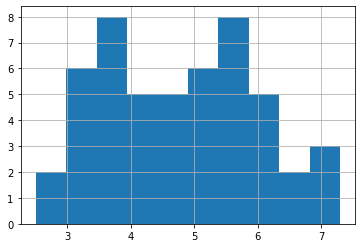

In [86]:
df['Urate'].hist()

Looks normal

No trasformation needed

In [87]:
df.Urate.mean()

4.804

#### T-test

In [88]:
TexasUR=df.at[42,'Urate']
TexasUR

5.7

In [89]:
stats.ttest_1samp(df['Urate'],TexasUR)

Ttest_1sampResult(statistic=-5.172382879513204, pvalue=4.271989287970536e-06)

##### Texas a significantly higher unemployment rate

In [90]:
IowaUR=df.at[14,'Urate']
IowaUR

4.2

In [91]:
stats.ttest_1samp(df['Urate'],IowaUR)

Ttest_1sampResult(statistic=3.4867402446718483, pvalue=0.0010418554527268562)

In [92]:
FloridaUR=df.at[8,'Urate']
FloridaUR

4.6

In [93]:
stats.ttest_1samp(df['Urate'],FloridaUR)

Ttest_1sampResult(statistic=1.1776407448891708, pvalue=0.24462810722852374)

##### No significance in unempolyment rate for
##### Florida and Iowa 
Showing have a average unemployment rate

#### Police Report Histogram

<AxesSubplot: >

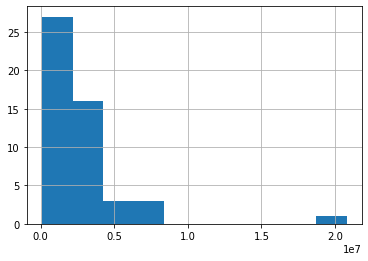

In [94]:
df['PoliceReports'].hist()

It is quite positively skewed! 

#### Square root transformation

<AxesSubplot: >

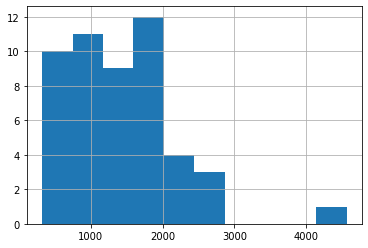

In [95]:
df['PoliceReports_SQRT']=np.sqrt(df['PoliceReports'])
df['PoliceReports_SQRT'].hist()

#### LOG
transformation

<AxesSubplot: >

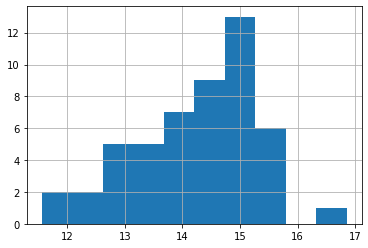

In [96]:
df['PoliceReports_LOG']=np.log(df['PoliceReports'])
df['PoliceReports_LOG'].hist()

Using LOG

In [98]:
df['PoliceReports'].mean()

2621942.3

In [99]:
FloridaRP=df.at[8,'PoliceReports']
FloridaRP


5431384

In [100]:
stats.ttest_1samp(df['PoliceReports'],FloridaRP)

Ttest_1sampResult(statistic=-6.250539504797936, pvalue=9.60763314272084e-08)

In [101]:
TexasRP=df.at[42,'PoliceReports']
TexasRP

20783195

In [102]:
stats.ttest_1samp(df['PoliceReports'],TexasRP)

Ttest_1sampResult(statistic=-40.40576014016171, pvalue=2.7556833782639504e-39)

Texas and Florida have signifcantly higher number of police reports

In [103]:
IowaRP=df.at[14,'PoliceReports']
IowaRP

1919259

In [104]:
stats.ttest_1samp(df['PoliceReports'],IowaRP)

Ttest_1sampResult(statistic=1.5633532192576831, pvalue=0.1244056211089517)

Iowa has an average amount of police reports

### Correlation Test

In [105]:
df['PoliceReports_LOG'].corr(df['Urate'])

0.0269956570920501

Very weak correlation

In [106]:
df.drop(['Change 2020-21'],axis=1, inplace=True)

In [107]:
df.corr(method='pearson').style.format("{:.2}")

C:\Users\dell\AppData\Local\Temp\ipykernel_15576\933052293.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson').style.format("{:.2}")


,Urate,Pop. 2021,PoliceReports,ViolentCrime,PropertyCrime,PrisonPopulation,Violentprison,PropertyPrison,PoliceReports_SQRT,PoliceReports_LOG
Urate,1.0,0.41,0.13,0.29,0.29,0.3,0.27,-0.2,0.1,0.027
Pop. 2021,0.41,1.0,0.57,0.87,0.84,0.92,0.38,-0.23,0.57,0.49
PoliceReports,0.13,0.57,1.0,0.55,0.55,0.69,0.14,-0.12,0.93,0.75
ViolentCrime,0.29,0.87,0.55,1.0,0.97,0.83,0.37,-0.18,0.54,0.47
PropertyCrime,0.29,0.84,0.55,0.97,1.0,0.77,0.38,-0.2,0.54,0.46
PrisonPopulation,0.3,0.92,0.69,0.83,0.77,1.0,0.28,-0.1,0.65,0.54
Violentprison,0.27,0.38,0.14,0.37,0.38,0.28,1.0,-0.58,0.084,-0.034
PropertyPrison,-0.2,-0.23,-0.12,-0.18,-0.2,-0.1,-0.58,1.0,-0.054,0.068
PoliceReports_SQRT,0.1,0.57,0.93,0.54,0.54,0.65,0.084,-0.054,1.0,0.93
PoliceReports_LOG,0.027,0.49,0.75,0.47,0.46,0.54,-0.034,0.068,0.93,1.0


C:\Users\dell\AppData\Local\Temp\ipykernel_15576\621126171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<AxesSubplot: >

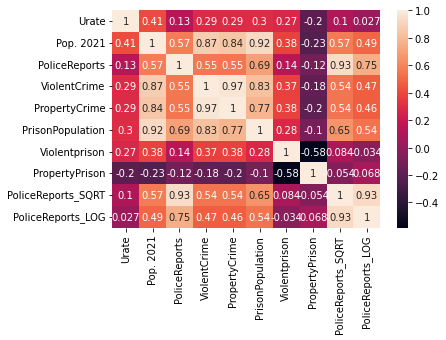

In [108]:
sns.heatmap(df.corr(), annot=True)

In [109]:
df.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

C:\Users\dell\AppData\Local\Temp\ipykernel_15576\2523080898.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)


,Urate,Pop. 2021,PoliceReports,ViolentCrime,PropertyCrime,PrisonPopulation,Violentprison,PropertyPrison,PoliceReports_SQRT,PoliceReports_LOG
Urate,1.0,0.41,0.13,0.29,0.29,0.3,0.27,-0.2,0.1,0.027
Pop. 2021,0.41,1.0,0.57,0.87,0.84,0.92,0.38,-0.23,0.57,0.49
PoliceReports,0.13,0.57,1.0,0.55,0.55,0.69,0.14,-0.12,0.93,0.75
ViolentCrime,0.29,0.87,0.55,1.0,0.97,0.83,0.37,-0.18,0.54,0.47
PropertyCrime,0.29,0.84,0.55,0.97,1.0,0.77,0.38,-0.2,0.54,0.46
PrisonPopulation,0.3,0.92,0.69,0.83,0.77,1.0,0.28,-0.1,0.65,0.54
Violentprison,0.27,0.38,0.14,0.37,0.38,0.28,1.0,-0.58,0.084,-0.034
PropertyPrison,-0.2,-0.23,-0.12,-0.18,-0.2,-0.1,-0.58,1.0,-0.054,0.068
PoliceReports_SQRT,0.1,0.57,0.93,0.54,0.54,0.65,0.084,-0.054,1.0,0.93
PoliceReports_LOG,0.027,0.49,0.75,0.47,0.46,0.54,-0.034,0.068,0.93,1.0


## Question Two
#### Does unemployment rate affect the correlation between police reports and prison rates?

### Stepwise Liner Regression